# MATH 564 Applied Stats Project

# Part I
Consider the 14-predictor data set (LINTHALL.txt). Use the ordinary least square
estimation to estimate the regression coefficients. Run the collinearity diagnostics and
identify if there is any collinearity. Try at least two collinearity diagnostics methods.
What is the consistent conclusion you can draw from the two methods?

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/mumer97/Applied-Stats/main/LINTHALL.txt',  delimiter=r"\s+")

# Display the first few rows of the data
print(data.head())


   Obs Loc  Type   BIO  H2S  SAL  Eh7    pH   BUF       P        K       Ca  \
0    1  OI  DVEG   676 -610   33 -290  5.00  2.34  20.238  1441.67  2150.00   
1    2  OI  DVEG   516 -570   35 -268  4.75  2.66  15.591  1299.19  1844.76   
2    3  OI  DVEG  1052 -610   32 -282  4.20  4.18  18.716  1154.27  1750.36   
3    4  OI  DVEG   868 -560   30 -232  4.40  3.60  22.821  1045.15  1674.36   
4    5  OI  DVEG  1008 -610   33 -318  5.55  1.90  37.843   521.62  3360.02   

        Mg       Na       Mn       Zn       Cu     NH4  
0  5169.05  35184.5  14.2857  16.4524  5.02381  59.524  
1  4358.03  28170.4   7.7285  13.9852  4.19019  51.378  
2  4041.27  26455.0  17.8066  15.3276  4.79221  68.788  
3  3966.08  25072.9  49.1538  17.3128  4.09487  82.256  
4  4609.39  31664.2  30.5229  22.3312  4.60131  70.904  


In [2]:
import statsmodels.api as sm

# Extract response variable (Y) and predictor variables (X)
Y = data['BIO']
X = data[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(Y, X).fit()

# Display the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     9.270
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           4.03e-07
Time:                        16:54:59   Log-Likelihood:                -302.70
No. Observations:                  43   AIC:                             635.4
Df Residuals:                      28   BIC:                             661.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3475.9507   3441.050      1.010      0.3

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


   Variable          VIF
0     const  4350.771896
1       H2S     3.136506
2       SAL     3.361283
3       Eh7     1.964076
4        pH    62.564383
5       BUF    33.478422
6         P     2.884226
7         K     7.432133
8        Ca    17.343432
9        Mg    24.476419
10       Na    10.372624
11       Mn     6.737786
12       Zn    12.391033
13       Cu     4.866983
14      NH4     8.586275


In [4]:
import numpy as np

correlation_mat = X.corr()

print(correlation_mat)

correlation_matrix_no_const = X.drop('const', axis=1).corr()

# Compute eigenvalues
eigenvalues = np.linalg.eig(correlation_matrix_no_const)[0]

print("\nEigen Values with reference to the correlation matrix:\n")
print(eigenvalues)

# Compute condition index for each eigen value
condition_indices = []

for j in range(len(eigenvalues)):
    max_eigenvalue = np.max(eigenvalues)
    min_eigenvalue = np.min(eigenvalues[j])  
    
    condition_index = np.sqrt(max_eigenvalue / min_eigenvalue)
    condition_indices.append(condition_index)

print("\nCondition Indices (K) for Eigen Values:\n")
print(condition_indices)

       const       H2S       SAL       Eh7        pH       BUF         P  \
const    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
H2S      NaN  1.000000  0.169190  0.430436  0.259976 -0.360190 -0.284927   
SAL      NaN  0.169190  1.000000  0.296771 -0.028847 -0.044753 -0.061205   
Eh7      NaN  0.430436  0.296771  1.000000  0.101170 -0.163304 -0.326211   
pH       NaN  0.259976 -0.028847  0.101170  1.000000 -0.946283 -0.579402   
BUF      NaN -0.360190 -0.044753 -0.163304 -0.946283  1.000000  0.590230   
P        NaN -0.284927 -0.061205 -0.326211 -0.579402  0.590230  1.000000   
K        NaN  0.074175 -0.020650  0.427850  0.028564 -0.084963 -0.243725   
Ca       NaN  0.097201  0.085460 -0.045807  0.882288 -0.797199 -0.391782   
Mg       NaN -0.090801 -0.035222  0.294838 -0.165704  0.115988 -0.008379   
Na       NaN  0.020682  0.140143  0.338063 -0.023624 -0.081745 -0.118908   
Mn       NaN  0.133887 -0.257924 -0.111838 -0.499060  0.453243  0.540701   
Zn       NaN

In [5]:
# For comparision with Part 2

# Calculate the sum of standard errors
sum_se = model.bse.sum()

# Calculate SSE (sum of squared errors)
sse = ((model.resid)**2).sum()

# Display the results
print("Sum of Standard Errors:", sum_se)
print("SSE (Sum of Squared Errors):", sse)


Sum of Standard Errors: 4069.5785326868586
SSE (Sum of Squared Errors): 3276740.2803900647


# Part II
Consider the 14-predictor data set (LINTHALL.txt). Use the Principle Components
Regression method with collinearity reduction to decide which principle components
will be included in the model. From the results of Principle Component Regression
on the reduced model, compute the regression coefficients ^βj in the original multiple
linear regression model. Compare the standard error sum
Σj  s⋅e(^βj ) and SSE with their counterparts in Part I.


Summary for PCR Regression:
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     12.55
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           3.58e-08
Time:                        16:55:00   Log-Likelihood:                -310.32
No. Observations:                  43   AIC:                             638.6
Df Residuals:                      34   BIC:                             654.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        991.7209  

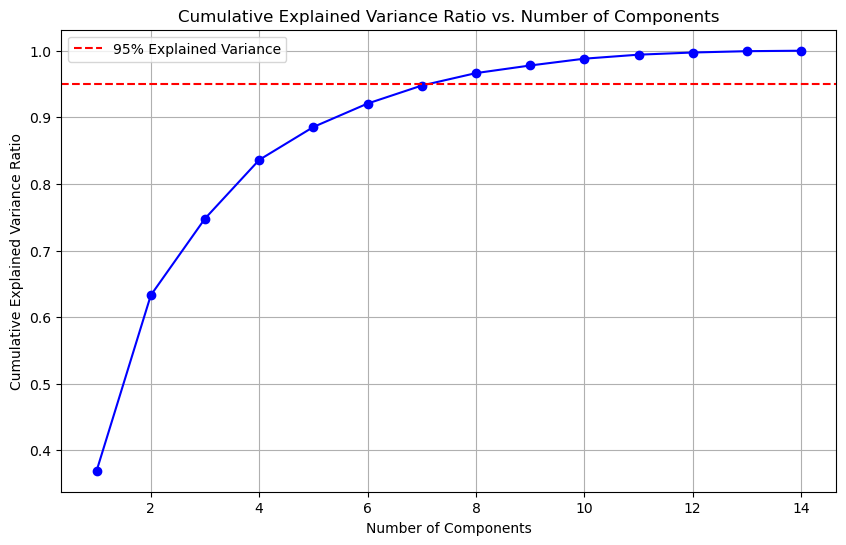


Comparison with Part I:
Standard Error Sum (PCR): 563.1008386421236
SSE (PCR): 4671275.61457344


In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import statsmodels.api as sm

# Read the data with proper delimiter
data = pd.read_csv('https://raw.githubusercontent.com/mumer97/Applied-Stats/main/LINTHALL.txt', delimiter=r"\s+")

# Extract response variable (Y) and predictor variables (X)
Y = data['BIO']
X = data[['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']]

# Standardize the predictor variables (important for PCA)
X_standardized = (X - X.mean()) / X.std()

# Perform Principal Components Analysis (PCA)
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Determine the number of components to include based on explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Select the relevant principal components
X_pcr = principal_components[:, :num_components]

# Add a constant term to the principal components
X_pcr = sm.add_constant(X_pcr)

# Fit the PCR model
model_pcr = sm.OLS(Y, X_pcr).fit()

# Display the summary of the PCR model
print("\nSummary for PCR Regression:")
print(model_pcr.summary())

import matplotlib.pyplot as plt

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Compare standard error sum and SSE with Part I
print("\nComparison with Part I:")
print("Standard Error Sum (PCR):", np.sum(model_pcr.bse))
print("SSE (PCR):", model_pcr.ssr)


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the PCR model
X_pcr_standardized = (X_pcr - X_pcr.mean()) / X_pcr.std()  # Standardize the PCR predictors
vif_pcr = pd.DataFrame()
vif_pcr["Variable"] = np.arange(X_pcr_standardized.shape[1])  # Use indices as variable names
vif_pcr["VIF"] = [variance_inflation_factor(X_pcr_standardized, i) for i in range(X_pcr_standardized.shape[1])]

# Print the result
print("\nVIF for PCR Model:")
print(vif_pcr)



VIF for PCR Model:
   Variable       VIF
0         0  1.149638
1         1  1.000000
2         2  1.000000
3         3  1.000000
4         4  1.000000
5         5  1.000000
6         6  1.000000
7         7  1.000000
8         8  1.000000


# PART III

In Part III, we consider a smaller data set (LINTH-5.txt) for convenience. The full
multiple linear regression model is:

Y ∼ X2 + X4 + X7 + X10 + X12

1) Y: BIO
2) X2: SAL
3) X4: pH
4) X7: K
5) X10: Na
6) X12: Zn

The data set only has 5 predictor variables, and yet it preserved some of the collinearity
problem. We will use the 5-predictor data set (LINTH-5.txt) to perform a variable
selection procedure.
1) Use the stepwise regression method to decide the best model. Use significance
level αE = αR = 0.10. At each step, report the result of regression, indicate
which predictor variable enters or leaves the model, and how the decision is made.
In the end, run the collinearity diagnostics again to verify that collinearity has
disappeared.

In [8]:
import pandas as pd
import statsmodels.api as sm

# Load the 5-predictor data set
data_5 = pd.read_csv('https://raw.githubusercontent.com/mumer97/Applied-Stats/main/LINTH-5.txt', delimiter=r"\s+")

# Extract response variable (Y) and predictor variables (X)
Y_5 = data_5['BIO']
X_5 = data_5[['SAL', 'pH', 'K', 'Na', 'Zn']]

# Stepwise regression
def stepwise_selection(X, y, alpha_in=0.10, alpha_out=0.10):
    included = []
    while True:
        changed = False
        # Add a predictor
        candidates = [var for var in X.columns if var not in included]
        p_values = []
        for candidate in candidates:
            model = sm.OLS(y, sm.add_constant(X[included + [candidate]])).fit()
            p_values.append((candidate, model.pvalues[candidate]))
        best_candidate, best_p_value = min(p_values, key=lambda x: x[1])
        if best_p_value < alpha_in:
            included.append(best_candidate)
            changed = True

        # Remove a predictor
        model = sm.OLS(y, sm.add_constant(X[included])).fit()
        p_values = [(var, model.pvalues[var]) for var in included]
        worst_candidate, worst_p_value = max(p_values, key=lambda x: x[1])
        if worst_p_value > alpha_out:
            included.remove(worst_candidate)
            changed = True

        if not changed:
            break

    return included

selected_variables_stepwise = stepwise_selection(X_5, Y_5)

# Display the result
print("Selected variables using stepwise regression:", selected_variables_stepwise)

# Summary for Stepwise Regression
X_selected_stepwise = X_5[selected_variables_stepwise]
X_selected_stepwise = sm.add_constant(X_selected_stepwise)
model_selected_stepwise = sm.OLS(Y_5, X_selected_stepwise).fit()
print("\nSummary for Stepwise Regression:")
print(model_selected_stepwise.summary())


Selected variables using stepwise regression: ['pH', 'Na']

Summary for Stepwise Regression:
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     37.13
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           7.64e-10
Time:                        16:55:01   Log-Likelihood:                -317.31
No. Observations:                  43   AIC:                             640.6
Df Residuals:                      40   BIC:                             645.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X_selected_stepwise.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected_stepwise.values, i) for i in range(X_selected_stepwise.shape[1])]

# Display VIFs
print("\nVIFs for Selected Variables:")
print(vif_data)


VIFs for Selected Variables:
  Variable        VIF
0    const  20.746465
1       pH   1.000558
2       Na   1.000558


# Ridge Regression

2) Use ridge regression on the 5-predictor model, and use ridge trace to do variable
selection. Refit the model that includes the remaining variables and then run the
collinearity diagnostics again to verify that collinearity has disappeared.

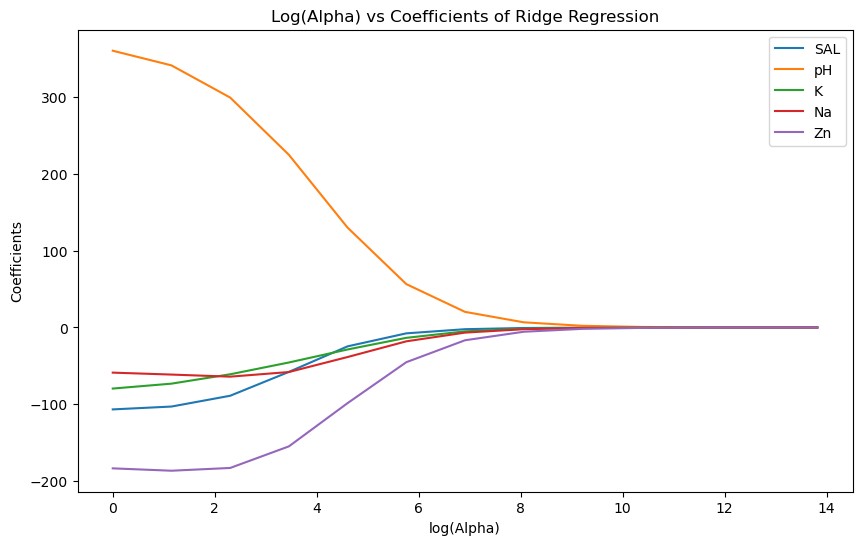

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Load the 5-predictor data set
data = pd.read_csv('https://raw.githubusercontent.com/mumer97/Applied-Stats/main/LINTH-5.txt', delimiter=r"\s+")

# Extracting the response variable (Y) and predictor variables (X)
Y = data['BIO']
X = data[['SAL', 'pH', 'K', 'Na', 'Zn']]

# Standardize predictors for Ridge regression
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Define a range of alpha values
alphas = np.logspace(0, 6, 13)

# Initialize an array to store coefficients for each alpha
coefficients = []

# Fit Ridge regression for each alpha and store coefficients
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_standardized, Y)
    coefficients.append(ridge.coef_)

# Plot log(alpha) versus coefficients
plt.figure(figsize=(10, 6))
plt.plot(np.log(alphas), coefficients)
plt.title('Log(Alpha) vs Coefficients of Ridge Regression')
plt.xlabel('log(Alpha)')
plt.ylabel('Coefficients')
plt.legend(X.columns)
plt.show()


In [11]:
# Standardize predictors for Ridge regression
scaler_ridge = StandardScaler()
X_standardized_ridge = scaler_ridge.fit_transform(X)

# Choose the log(alpha) value around 8
selected_log_alpha = 8.0
selected_alpha = np.exp(selected_log_alpha)

# Refit the model with the remaining variables and the chosen alpha
ridge_selected = Ridge(alpha=selected_alpha)
ridge_selected.fit(X_standardized_ridge, Y)

# Identify remaining variables based on the ridge trace with a coefficient threshold (e.g., > 5)
remaining_variables_ridge = X.columns[np.abs(ridge_selected.coef_) > 5]

# Display the result
print("\nRemaining variables using Ridge regression:", remaining_variables_ridge)

# Create a new scaler for the subset of columns
scaler_subset = StandardScaler()
X_subset_standardized = scaler_subset.fit_transform(X[remaining_variables_ridge])

# Refit the model with the remaining variables
model_remaining_ridge = sm.OLS(Y, sm.add_constant(X_subset_standardized)).fit()

# Run collinearity diagnostics
print("\nSummary for Ridge Regression:")
print(model_remaining_ridge.summary())

# Collinearity diagnostics
vif = pd.DataFrame()
vif["Variable"] = remaining_variables_ridge
vif["VIF"] = [variance_inflation_factor(X_subset_standardized, i) for i in range(X_subset_standardized.shape[1])]

# Print - results
print("\n" + "="*20)
print("\nVIF:\n", vif)



Remaining variables using Ridge regression: Index(['pH', 'Zn'], dtype='object')

Summary for Ridge Regression:
                            OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     30.60
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           8.68e-09
Time:                        16:55:01   Log-Likelihood:                -319.92
No. Observations:                  43   AIC:                             645.8
Df Residuals:                      40   BIC:                             651.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

# Subset Selection using BIC and VIF

3) Use the subset selection method to decide the best two-variable model on the basis
of BIC. If there is a tie, use VIF to break the tie.

In [12]:
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

# Function to calculate BIC
def calculate_bic(y, y_pred, num_params):
    n = len(y)
    residuals = y - y_pred
    mse = np.sum(residuals ** 2) / n
    bic = n * math.log(mse) + num_params * math.log(n)
    return bic

# Function for subset selection based on BIC and VIF
def subset_selection_bic_vif(X, y, max_variables=2):
    best_bic = float('inf')
    best_subset = None

    for r in range(1, min(max_variables + 1, X.shape[1] + 1)):
        for subset in combinations(X.columns, r):
            model = sm.OLS(y, sm.add_constant(X[list(subset)])).fit()
            vif = [variance_inflation_factor(sm.add_constant(X[list(subset)]).values, i) for i in range(len(subset) + 1)]
            bic = calculate_bic(y, model.predict(), len(subset) + 1)

            if bic < best_bic and all(v < 10 for v in vif[1:]):
                best_bic = bic
                best_subset = subset

    return best_subset, best_bic

# Perform subset selection
selected_variables_subset, bestbic = subset_selection_bic_vif(X_5, Y_5)

# Display the result
print("\nSelected variables using subset selection:", selected_variables_subset)
print("\nBest BIC for the selected model using subset selection:", bestbic)

# Run collinearity diagnostics
X_selected_subset = X_5[list(selected_variables_subset)]
X_selected_subset = sm.add_constant(X_selected_subset)
model_selected_subset = sm.OLS(Y_5, X_selected_subset).fit()



Selected variables using subset selection: ('pH', 'Na')

Best BIC for the selected model using subset selection: 523.8650056733826


In [13]:
# Calculate and print VIF for selected variables in the best subset
X_selected_subset_standardized = scaler.fit_transform(X_selected_subset.iloc[:, 1:])  # Exclude the constant term
vif_subset = pd.DataFrame()
vif_subset["Variable"] = X_selected_subset.columns[1:]  # Exclude the constant term
vif_subset["VIF"] = [variance_inflation_factor(X_selected_subset_standardized, i) for i in range(X_selected_subset_standardized.shape[1])]

# Print the result
print("\nVIF for Selected Variables in the Best Subset:")
print(vif_subset)



VIF for Selected Variables in the Best Subset:
  Variable       VIF
0       pH  1.000558
1       Na  1.000558
